In [1]:
import numpy as np
import pyhf
import matplotlib.pyplot as plt 
import uproot
import pandas as pd 
from pyhf.contrib.viz import brazil

In [2]:
path_to_hists = "data/"
path_to_dt = "data/dt/" 
path_to_bkg = "data/bkg/"
dp_masses = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
var=['CV','dirt','ext']
correct=[28.13, 4.3,1.22,0.5,0.248,0.16,0.14,0.20,0.59,6.3]
POT=[1.87,3.08,4.59,7.90,15,31.7,81.6,279,1700,34500]
exp_pot=[2,2,2,2,2,2,2,2,2,2]
weight=(np.array(exp_pot)*np.array(correct))/np.array(POT)
weight_2=[0.542162,(2e20*0.75) / 1.67392e+21,1.002727292]
names=locals()
uncertainty = 0.1
nominal_eps = 1e-3 
obs_eps = []
exp_eps = []
exp_eps_dt = []
exp_eps_h1s = []
exp_eps_l1s = []
exp_eps_h2s = []
exp_eps_l2s = []
scaling_list = [] 
scaling = 5. 
scaling_dt= 1.
dt_bkg = np.zeros(5)
dt_sig=[]

In [3]:
for dt,w in zip(var,weight_2):
    file_name="run1_NuMI_"+str(dt)+".csv"
    print("Opening file: ", file_name)
    data = pd.read_csv(path_to_bkg+file_name,usecols=['bdt_score'],dtype=np.float64)
    dataL= data.to_numpy()
    names['bdt_' + str(var)] = dataL
    names['weight_' + str(var)] = w
    (counts, bins) = np.histogram(names['bdt_' + str(var)], bins=np.linspace(0,1,6))
    dt_bkg=counts*w+dt_bkg
    
dt_bkg=dt_bkg.tolist()

for dt,w in zip(dp_masses,weight):
    file_name="df_trident_"+str(dt)+"_score_test.csv"
    print("Opening file: ", file_name)
    data = pd.read_csv(path_to_dt+file_name,usecols=['bdt_score'],dtype=np.float64)
    dataL= data.to_numpy()
    names['bdt_' + str(dt)] = dataL
    names['weight_' + str(dt)] = w
    (counts, bins) = np.histogram(names['bdt_' + str(dt)], bins=np.linspace(0,1,6))
    sig_dt=np.array(counts*w)
    dt_sig.append(sig_dt)
    
    total_sig = np.sum(sig_dt)
    total_bkg = np.sum(dt_bkg)
    factor = scaling_dt*(total_bkg/total_sig)
    scaling_list.append(factor)
    
    n_sig = sig_dt
    n_back = dt_bkg
    back_sigma = dt_bkg*np.array([0.3,0.3,0.3,0.3,0.3])

    model=pyhf.simplemodels.uncorrelated_background(
        signal=n_sig*factor, bkg=n_back,
        bkg_uncertainty=back_sigma)
    
    obs = observations_1 = n_back + model.config.auxdata
    
    poi_values = np.linspace(0., 10., 100)
    obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
        obs, model, poi_values, level=0.05, return_results=True)
    print(f"Upper limit (obs): μ = {obs_limit:.4f}")
    print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")
    obs_epsilon = (nominal_eps**2)*np.sqrt(obs_limit*factor)
    exp_l1s=(nominal_eps**2)*np.sqrt(exp_limits[1]*factor)
    exp_h1s=(nominal_eps**2)*np.sqrt(exp_limits[3]*factor)
    exp_l2s=(nominal_eps**2)*np.sqrt(exp_limits[0]*factor)
    exp_h2s=(nominal_eps**2)*np.sqrt(exp_limits[4]*factor)
    exp_epsilon = (nominal_eps**2)*np.sqrt(exp_limits[2]*factor)
    exp_eps_l1s.append(exp_l1s)
    exp_eps_h1s.append(exp_h1s)
    exp_eps_l2s.append(exp_l2s)
    exp_eps_h2s.append(exp_h2s)
    exp_eps_dt.append(exp_epsilon)

    print(f"Upper limit (obs): epsilon2 = {obs_epsilon}")
    print(f"Upper limit (exp): epsilon2 = {exp_epsilon}")
    print("\n")
    

    

Opening file:  run1_NuMI_CV.csv
Opening file:  run1_NuMI_dirt.csv
Opening file:  run1_NuMI_ext.csv
Opening file:  df_trident_0.01_score_test.csv
Upper limit (obs): μ = 0.0960
Upper limit (exp): μ = 0.0960
Upper limit (obs): epsilon2 = 4.800325324751611e-08
Upper limit (exp): epsilon2 = 4.800325324751611e-08


Opening file:  df_trident_0.02_score_test.csv
Upper limit (obs): μ = 0.0960
Upper limit (exp): μ = 0.0960
Upper limit (obs): epsilon2 = 1.566828023114101e-07
Upper limit (exp): epsilon2 = 1.566828023114101e-07


Opening file:  df_trident_0.03_score_test.csv
Upper limit (obs): μ = 0.0960
Upper limit (exp): μ = 0.0960
Upper limit (obs): epsilon2 = 3.7425434447185594e-07
Upper limit (exp): epsilon2 = 3.7425434447185594e-07


Opening file:  df_trident_0.04_score_test.csv
Upper limit (obs): μ = 0.0960
Upper limit (exp): μ = 0.0960
Upper limit (obs): epsilon2 = 7.678327472960822e-07
Upper limit (exp): epsilon2 = 7.678327472960822e-07


Opening file:  df_trident_0.05_score_test.csv
Upper

/root/pyhf-tutorial/lib/python3.8/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Upper limit (obs): μ = 0.0960
Upper limit (exp): μ = 0.0960
Upper limit (obs): epsilon2 = 7.786689633249254e-06
Upper limit (exp): epsilon2 = 7.786689633249254e-06


Opening file:  df_trident_0.09_score_test.csv
Upper limit (obs): μ = 0.0960
Upper limit (exp): μ = 0.0960
Upper limit (obs): epsilon2 = 1.1518791308807783e-05
Upper limit (exp): epsilon2 = 1.1518791308807783e-05


Opening file:  df_trident_0.1_score_test.csv
Upper limit (obs): μ = 0.0960
Upper limit (exp): μ = 0.0960
Upper limit (obs): epsilon2 = 1.5783363477784107e-05
Upper limit (exp): epsilon2 = 1.5783363477784107e-05




In [4]:
for mass in dp_masses:
    file_name="dt_hists_mass_"+str(mass)+".root"
    print("Opening file: ", file_name)
    file = uproot.open(path_to_hists+file_name)
    print("Contents on this file: ", file.classnames())
    print("Signal events: {nevts:.2f}".format( nevts= np.sum(file["signal"].values())))
    print("Background events: {nevts:.2f}".format( nevts= np.sum(file["background"].values())))
    
    total_sig = np.sum(file["signal"].values())
    total_bkg = np.sum(file["background"].values())
    factor = scaling*(total_bkg/total_sig)
    scaling_list.append(factor)
    
    # scaling signal, to have a reasonable signal strength between 0 and 10
    n_sig = (file["signal"].values()*factor).tolist()
    n_back = file["background"].values().tolist()
    back_sigma = (file["background"].values()*uncertainty).tolist()
    
    model=pyhf.simplemodels.uncorrelated_background(
        signal=n_sig, bkg=n_back,
        bkg_uncertainty=back_sigma)
    
    obs = observations_1 = n_back + model.config.auxdata
    
    poi_values = np.linspace(0., 10., 100)
    obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(
        obs, model, poi_values, level=0.05, return_results=True)
    print(f"Upper limit (obs): μ = {obs_limit:.4f}")
    print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")
    obs_epsilon = (nominal_eps**2)*np.sqrt(obs_limit*factor)
    exp_epsilon = (nominal_eps**2)*np.sqrt(exp_limits[2]*factor)
    exp_eps.append(exp_epsilon)
    print(f"Upper limit (obs): epsilon2 = {obs_epsilon}")
    print(f"Upper limit (exp): epsilon2 = {exp_epsilon}")
    print("\n")
    

Opening file:  dt_hists_mass_0.01.root
Contents on this file:  {'signal;1': 'TH1D', 'background;1': 'TH1D'}
Signal events: 31472.11
Background events: 13.08


/tmp/ipykernel_1897/1064524534.py:26: DeprecationWarning: pyhf.infer.intervals.upperlimit is deprecated in favor of pyhf.infer.intervals.upper_limits.upper_limit as of pyhf v0.7.0 and will be removed in pyhf v0.9.0. Please use pyhf.infer.intervals.upper_limits.upper_limit.
  obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(


Upper limit (obs): μ = 0.1342
Upper limit (exp): μ = 0.1342
Upper limit (obs): epsilon2 = 1.6697055354159042e-08
Upper limit (exp): epsilon2 = 1.6697055354159042e-08


Opening file:  dt_hists_mass_0.02.root
Contents on this file:  {'signal;1': 'TH1D', 'background;1': 'TH1D'}
Signal events: 3255.01
Background events: 13.08
Upper limit (obs): μ = 0.1360
Upper limit (exp): μ = 0.1360
Upper limit (obs): epsilon2 = 5.2279797350476214e-08
Upper limit (exp): epsilon2 = 5.2279797350476214e-08


Opening file:  dt_hists_mass_0.03.root
Contents on this file:  {'signal;1': 'TH1D', 'background;1': 'TH1D'}
Signal events: 751.23
Background events: 13.08
Upper limit (obs): μ = 0.1402
Upper limit (exp): μ = 0.1402
Upper limit (obs): epsilon2 = 1.1048775235978878e-07
Upper limit (exp): epsilon2 = 1.1048775235978878e-07


Opening file:  dt_hists_mass_0.04.root
Contents on this file:  {'signal;1': 'TH1D', 'background;1': 'TH1D'}
Signal events: 211.11
Background events: 13.08
Upper limit (obs): μ = 0.1439


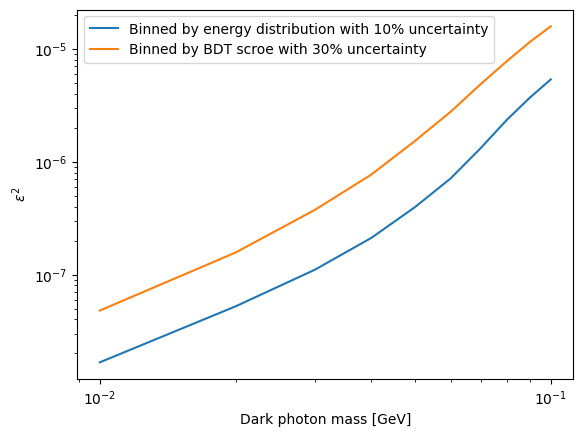

In [14]:
import pandas as pd
plt.plot(dp_masses,exp_eps,label='Binned by energy distribution with 10% uncertainty')
plt.plot(dp_masses,exp_eps_dt,label='Binned by BDT scroe with 30% uncertainty')
plt.xlabel('Dark photon mass [GeV]')
plt.ylabel(r'$\varepsilon^{2}$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.savefig("figure.png")

In [11]:
exp_eps_l1s

[4.800325324751611e-08,
 1.566828023114101e-07,
 3.7425434447185594e-07,
 7.678327472960822e-07,
 1.5258250507847981e-06,
 2.7681202222852376e-06,
 4.875101315696245e-06,
 7.786689633249254e-06,
 1.1518791308807783e-05,
 1.5783363477784107e-05]

In [12]:
exp_eps_h1s

[4.800325324751611e-08,
 1.566828023114101e-07,
 3.7425434447185594e-07,
 7.678327472960822e-07,
 1.5258250507847981e-06,
 2.7681202222852376e-06,
 4.875101315696245e-06,
 7.786689633249254e-06,
 1.1518791308807783e-05,
 1.5783363477784107e-05]